In [4]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 10)

In [53]:
def loadData(filename, delim='\t'):
    fr = open(filename)
    datasets = []
    for line in fr.readlines():
        listOfLine = line.strip().split(delim)
        listOfArray = []
        for data in listOfLine:
            listOfArray.append(float(data))
        datasets.append(listOfArray)
    return np.array(datasets).T

def pca(datasets, NumFeat):
    # center the data
    mean = np.reshape(np.mean(datasets, axis=1), (-1, 1))
    dataCentered = datasets - mean
    eigVals, eigVects = np.linalg.eig(dataCentered.dot(dataCentered.T))
    projectVect = eigVects[:, np.argsort(eigVals)[::-1][:NumFeat]]
    reduceData = projectVect.T.dot(dataCentered)
    approximateData = projectVect.dot(reduceData) + mean
    return reduceData, approximateData

def replaceNaNWithMean(datasets):
    p, n = np.shape(datasets)
    for dim in range(p):
        dataNotNan = datasets[dim][~np.isnan(datasets[dim])]  # for each dimension, figure out non-nan elments
        mean = np.mean(dataNotNan)
        datasets[dim][np.isnan(datasets[dim])] = mean  # replace all of nan values with mean
    return datasets

def pca2(datasets):
    # center the data
    mean = np.reshape(np.mean(datasets, axis=1), (-1, 1))
    dataCentered = datasets - mean
    eigVals, eigVects = np.linalg.eig(dataCentered.dot(dataCentered.T))
    eigValsSorted = eigVals[np.argsort(eigVals)[::-1]]
    return eigValsSorted

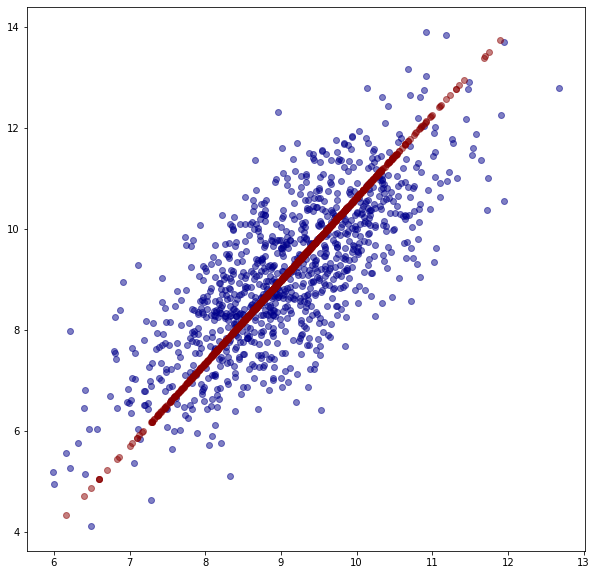

In [52]:
datasets = loadData('testSet.txt', '\t')  # 2*1000
reduceData, approximateData = pca(datasets, 1)

plt.scatter(datasets[0], datasets[1], color='darkblue', alpha=0.5)
plt.scatter(approximateData[0], approximateData[1], color='darkred', alpha=0.5)

In [36]:
secomDatasets = loadData('secom.data', ' ')  # 590*1567

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [ True, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False]])

pick first 6 principle dimensions


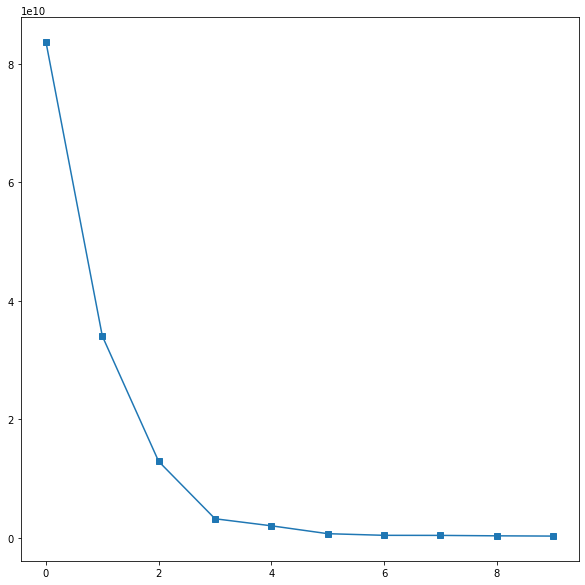

In [63]:
dataClean = replaceNaNWithMean(secomDatasets)
eigenvalues = pca2(dataClean)
x = np.arange(np.shape(eigenvalues)[0])
plt.plot(x[:10], eigenvalues[:10], marker='s')
print("pick first 6 principle dimensions")

In [64]:
pca(dataClean, 6)

(array([[5183.89616507, 1866.69728394, 3154.74165413, ..., 3821.21714302,
         4271.04023715, 3562.87329382],
        [3022.64772377, 4021.63902468, 3461.98581552, ...,  157.30328822,
         1300.47276359, 3727.60719872],
        [-688.38624272, 1505.57352582, 1855.44207771, ..., 1198.46485098,
         -381.63452019,  418.43547367],
        [  57.92893142,  199.23992427, -153.33360802, ...,  -15.13555733,
          298.64738407,  -35.86509797],
        [-349.28054496,  640.23125989,  139.53362841, ..., -479.52922352,
         -757.62307958,  132.60920158],
        [ -41.1987254 ,  -46.32552024,  -29.23236202, ...,  -53.46157085,
          -51.07238061,  -16.28202608]]),
 array([[3.01066325e+03, 3.01255070e+03, 3.01275173e+03, ...,
         3.01234748e+03, 3.01087087e+03, 3.01192407e+03],
        [2.49406731e+03, 2.49352915e+03, 2.49627540e+03, ...,
         2.49961509e+03, 2.49723643e+03, 2.49369891e+03],
        [2.20213724e+03, 2.20206516e+03, 2.20235917e+03, ...,
         2.2